## Algoritmo: Naive Bayes

En este ejemplo se utiliza el algoritmo de clasificación: **Naive Bayes** para predecir si existe sequía o no en una ciudad a partir del clima y la temperatura, los datos son:

| Variable       | Tipo             | Descripción                                         |
|----------------|------------------|-----------------------------------------------------|
| clima       | Cadena  | Es el clima actual de la ciudad (soleado, nublado, lluvioso)                |
| temperatura       | Cadena  | Temperatura actual de la ciudad (caliente, templado, frio)                |
| Sequía       | Cadena  | Describe la existencia de sequía para la ciudad  (si, no)                |                   |

**Nota:** Los datos de este ejemplo ya tienen preprocesamiento.

### Paso 1: Importar las librerias

In [1]:
# Libreria para operaciones matemáticas o estadísticas
import numpy as np
# Libreria para manejo de datos
import pandas as pd
# Librerias para gráficas
import matplotlib.pyplot as plt
import seaborn as sb
# Librería para transformar datos
from sklearn.preprocessing import LabelEncoder
# Libreria para separar el conjunto de datos (entrenamiento y pruebas)
from sklearn.model_selection import train_test_split
# Librería para Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Libreria para generar la métrica: matriz de confusión
from sklearn.metrics import confusion_matrix
# Libreria para generar el reporte de clasificación
from sklearn.metrics import classification_report

### Paso 2: Cargar el archivo plano en un DataFrame

In [2]:
# Se cargan los datos del archivo plano: '1.6-clima.csv' a un DataFrame
data = pd.read_csv("data/1.6-clima.csv")

### Paso 3: Explorar los datos

In [3]:
# Se muestran los primeros 10 registros del DataFrame
data.head(10)

,clima,temperatura,sequia
0,soleado,caliente,si
1,soleado,caliente,si
2,nublado,caliente,si
3,lluvioso,templado,si
4,lluvioso,frio,no
5,lluvioso,frio,no
6,nublado,frio,si
7,soleado,templado,no
8,soleado,frio,si
9,lluvioso,templado,si


### Paso 4: Procesar los datos


In [4]:
# Se reemplazan los valores de tipo cadena a numéricos para generar la predicción
le = LabelEncoder()

data['clima'] = le.fit_transform(data['clima'])
data['temperatura'] = le.fit_transform(data['temperatura'])
data['sequia'] = le.fit_transform(data['sequia'])

data

,clima,temperatura,sequia
0,2,0,1
1,2,0,1
2,1,0,1
3,0,2,1
4,0,1,0
5,0,1,0
6,1,1,1
7,2,2,0
8,2,1,1
9,0,2,1


In [5]:
# Se cuentan los registros con valor 1 y 0 (es decir si existe o no sequía)
sequia_si = np.sum(data['sequia'] == 1)
sequia_no = np.sum(data['sequia'] == 0)

print("Sequía si =", sequia_si)
print("Sequía no =", sequia_no)

Sequía si = 32
Sequía no = 18


In [6]:
# También se pueden agrupar y traer su tamaño (0- No sequía, 1- Si sequía)
print(data.groupby('sequia').size())

sequia
0    18
1    32
dtype: int64


##### NOTA: Los datos están desbalanceados, se debería aplicar la técnica de balanceo que incluye **Oversampling** o **undersampling**. Sin embargo, este proceso lo realizaremos con el algoritmo: Árbol de Decisión (siguiente ejemplo).

### Paso 5: Generar las visualizaciones

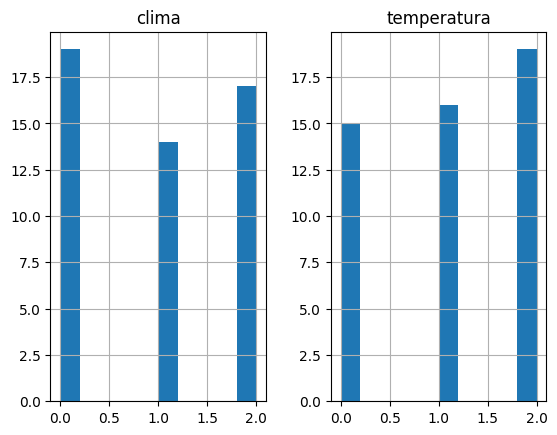

In [7]:
# Se genera el histograma de los datos, pero se excluye la clase (sequía) porque es lo que queremos predecir.
data.drop(['sequia'], axis=1).hist() # La columna se elimina de manera temporal, es decir solo para la gráfica
plt.rcParams['figure.figsize'] = (10, 10)
plt.show()

In [8]:
# Se verifica que todas las columnas están en el DataFrame data
data.head()

,clima,temperatura,sequia
0,2,0,1
1,2,0,1
2,1,0,1
3,0,2,1
4,0,1,0


In [9]:
# Se generan las estadísticas de los datos
data.describe()

,clima,temperatura,sequia
count,50.00000,50.000000,50.000000
mean,0.96000,1.080000,0.640000
std,0.85619,0.829064,0.484873
min,0.00000,0.000000,0.000000
25%,0.00000,0.000000,0.000000
50%,1.00000,1.000000,1.000000
75%,2.00000,2.000000,1.000000
max,2.00000,2.000000,1.000000


##### NOTA: Las estadísticas permiten identificar: menor valor, mayor valor, media, desviación estándar (SD), mediana y cuartiles para las columnas numéricas del DataFrame.

### Paso 6: Generar la predicción con el algoritmo Gaussian Naive Bayes de la librería SKLearn

In [10]:
# Se deja en X todas las características para el modelo
features = ['clima', 'temperatura']
X = data[features]
# Se deja en y la clase (sequia) porque es lo que queremos predecir
y = data['sequia'].values

# Dividimos el conjunto de datos en entrenamiento (80%) y pruebas (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=6)

# Creamos el modelo, lo ponemos a aprender con fit() y obtenemos predicciones sobre nuestro conjunto de test
# Se instancia el clasificador
nb = GaussianNB()
# Se entrena el clasificador
nb.fit(X_train, y_train)
# Se genera la predicción
prediccion = nb.predict(X_test)

# Se imprime la matriz de confusión
print(confusion_matrix(y_test, prediccion))
# Se imprime la Accuracy del modelo
print(classification_report(y_test, prediccion))

[[0 2]
 [2 6]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.75      0.75      0.75         8

    accuracy                           0.60        10
   macro avg       0.38      0.38      0.38        10
weighted avg       0.60      0.60      0.60        10



##### NOTA: Se puede observar que el accuracy del modelo es del 0.60%. Sin embargo, esta métrica no es tan precisa como: F1 score, que requiere de la **precision** y el **recall**. En el próximo ejercicio utilizaremos esta métricas (ejemplo árbol de decisión).

In [11]:
# Se genera una predicción con datos nuevos
# clima = 2 (soleado)
# temperatura = 1 (caliente)
print( nb.predict([[2, 1]]) )
#Resultado esperado 0-No sequía, 1-Sequia
# Para el ejemplo se predice que hay sequía [1]

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
